In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
import mplfinance as mpf

sns.set(style='darkgrid')

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

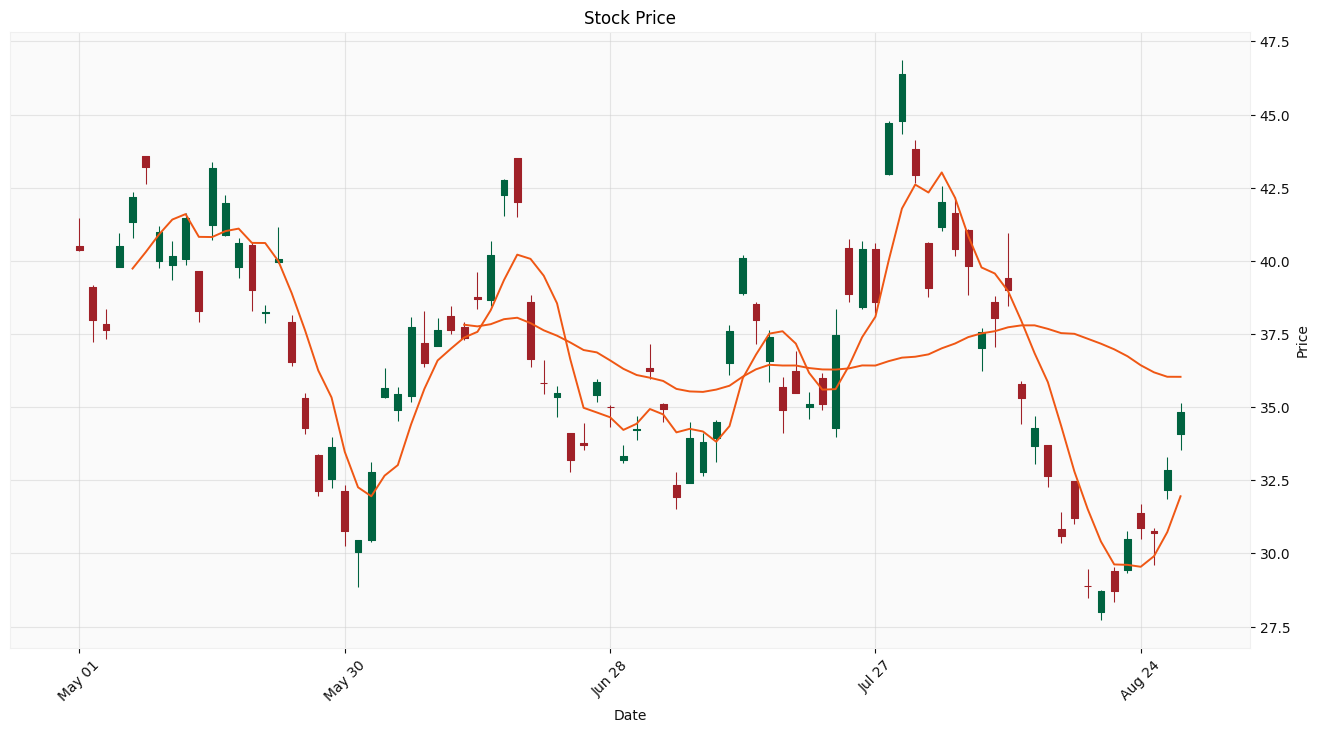

In [2]:
# play around with mplfinance

fig = mpf.figure(style='yahoo', figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Create the Candlestick chart using mplfinance
df_yinn = yf.download('yinn'.upper(), start='2023-05-01', end=datetime.today().strftime('%Y-%m-%d'))
mpf.plot(df_yinn, type='candle', style='charles', mav=(5,30), axtitle="Stock Price", ylabel="Price", ax=ax)
ax.grid(True, alpha=0.5)
ax.set_xlabel("Date")

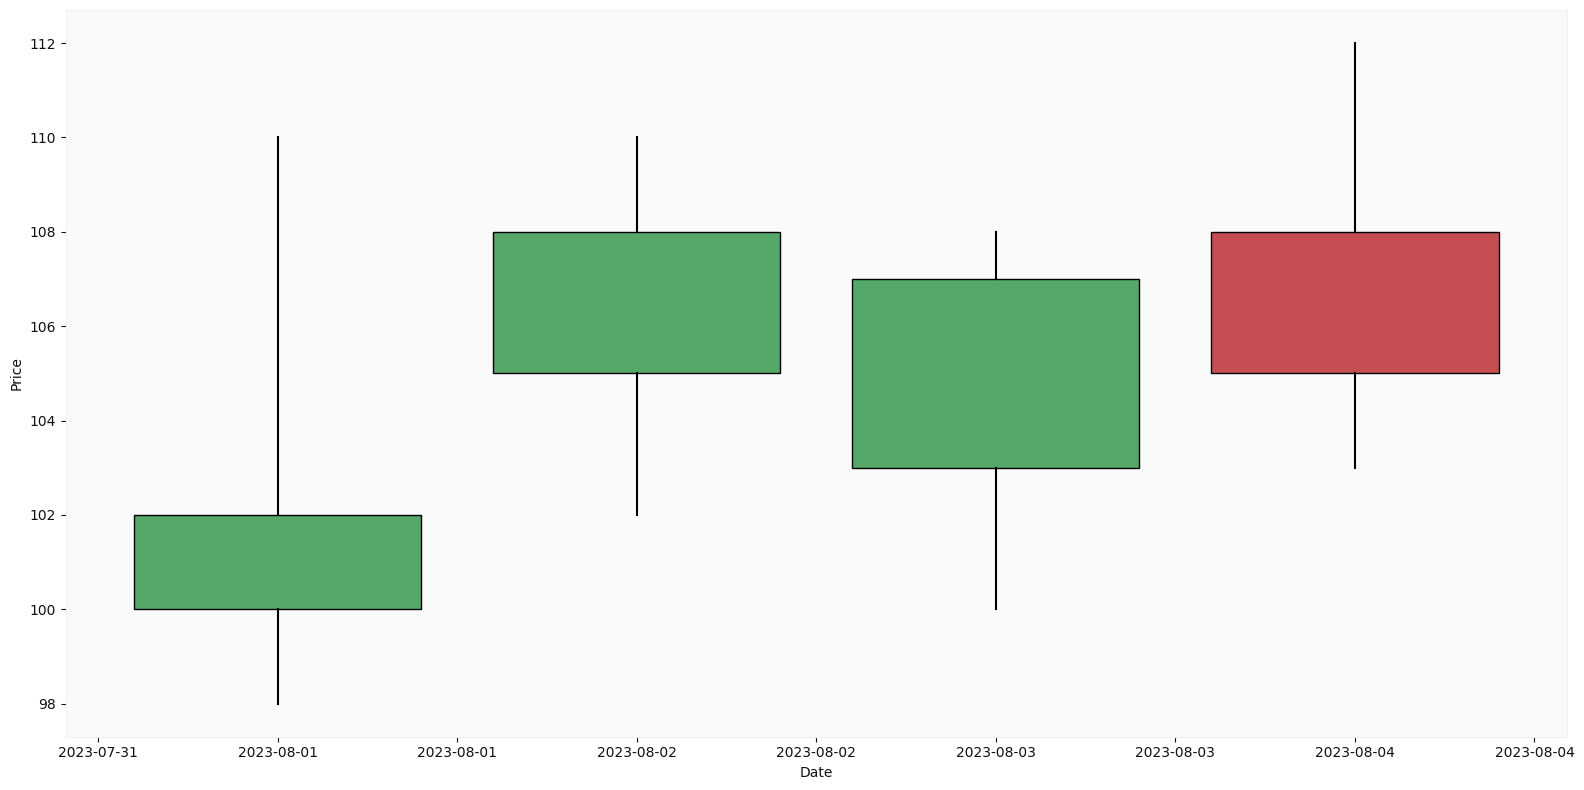

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample data for the Candlestick chart
data = {'date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04'],
        'open': [100, 105, 103, 108],
        'close': [102, 108, 107, 105],
        'high': [110, 110, 108, 112],
        'low': [98, 102, 100, 103]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.grid(True, alpha=0.5)

# Convert dates to mdates
mdates_df = df.reset_index()
mdates_df['date'] = mdates.date2num(mdates_df['date'])

# Plot candlesticks
for index, row in mdates_df.iterrows():
    open_price = row['open']
    close_price = row['close']
    high_price = row['high']
    low_price = row['low']
    date = row['date']
    
    if close_price >= open_price:
        color = 'g'  # Green for bullish
        rect_height = close_price - open_price
        bottom = open_price
    else:
        color = 'r'  # Red for bearish
        rect_height = open_price - close_price
        bottom = close_price
    
    # Plot candlestick body
    ax.add_patch(plt.Rectangle((date - 0.4, bottom), 0.8, rect_height,
                                facecolor=color, edgecolor='black'))
    
    # Plot upper wick
    ax.plot([date, date], [high_price, max(open_price, close_price)],
            color='black')
    
    # Plot lower wick
    ax.plot([date, date], [low_price, min(open_price, close_price)],
            color='black')

# Customize the appearance and layout of the plot
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid()

# Show the plot
plt.tight_layout()
plt.show()